#1 Import Library & Load Dataset

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
# Mengimpor dataset dari URL
url = "https://raw.githubusercontent.com/portodit/TechnicalAssignment-2/main/ai4i2020.csv"
dataset = pd.read_csv(url)

#2 Data Prepocessing

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [ ]:

# Deskripsi data
print(dataset.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

#3 Exploratory Data Analysis

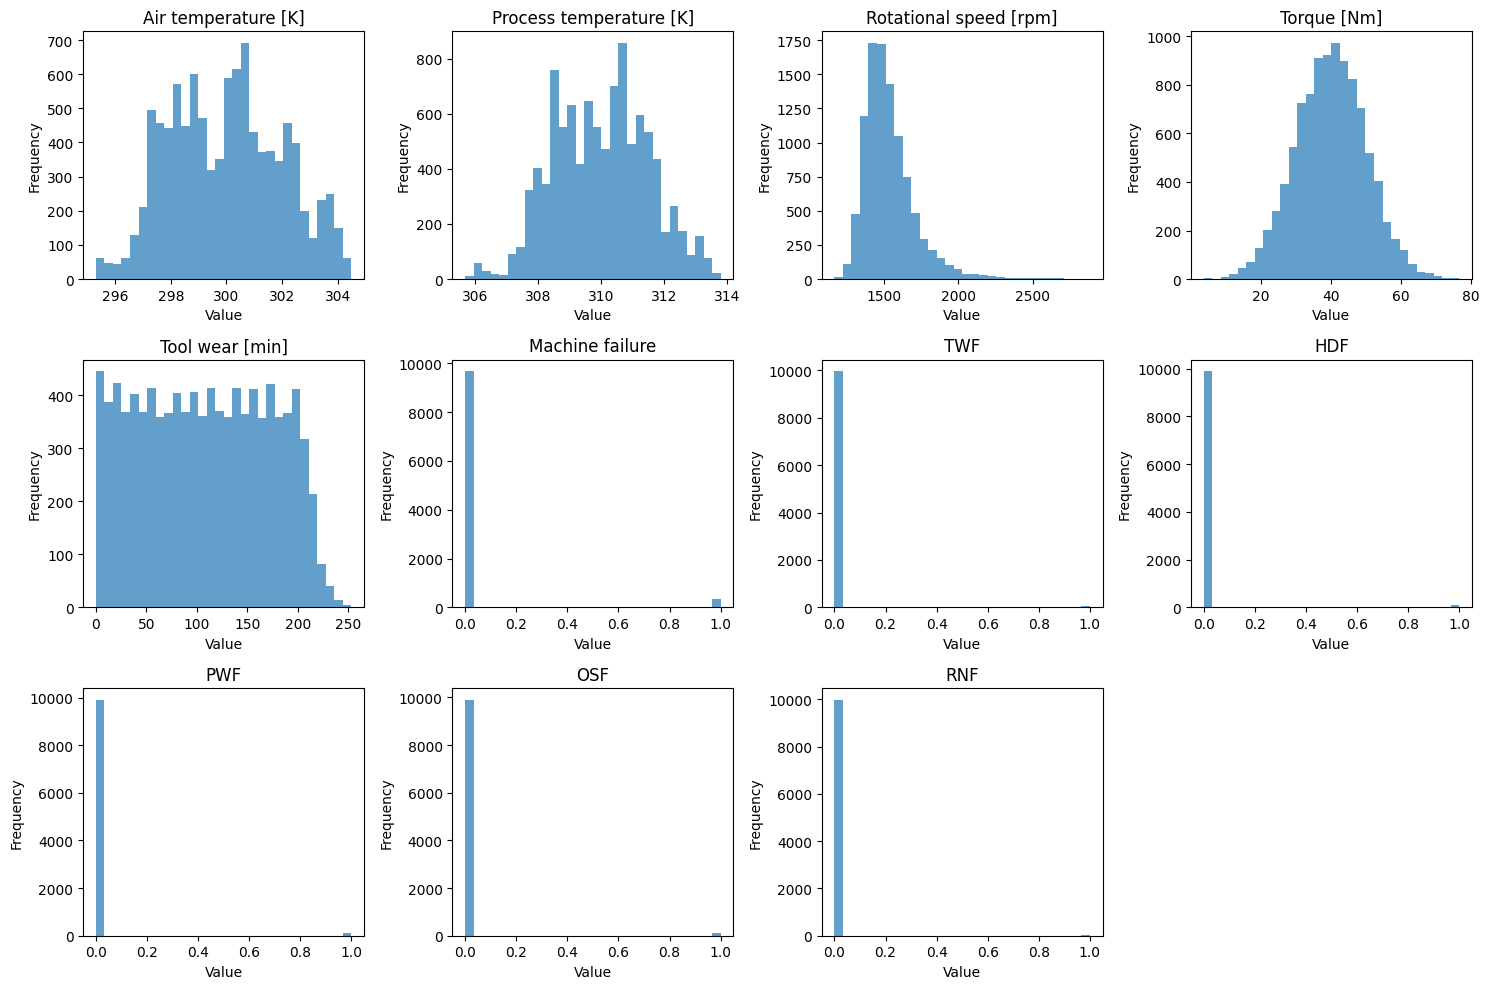

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

columns = ['Air temperature [K]', 'Process temperature [K]',
           'Rotational speed [rpm]', 'Torque [Nm]',
           'Tool wear [min]', 'Machine failure',
           'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Membuat histogram untuk setiap kolom numerik
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(3, 4, i)  # 3 baris, 4 kolom
    plt.hist(dataset[column].dropna(), bins=30, alpha=0.7)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

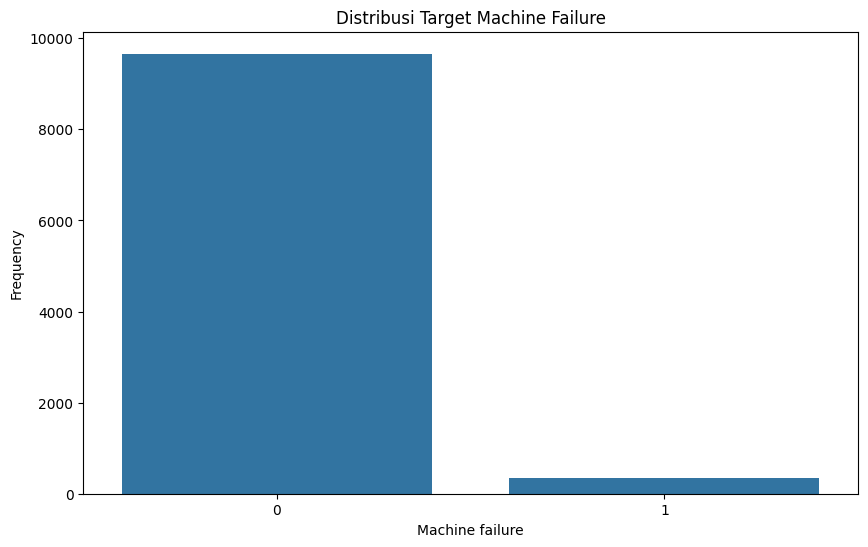

In [ ]:
# Bar chart untuk distribusi target
plt.figure(figsize=(10, 6))
sns.countplot(x='Machine failure', data=dataset)
plt.title('Distribusi Target Machine Failure')
plt.xlabel('Machine failure')
plt.ylabel('Frequency')
plt.show()

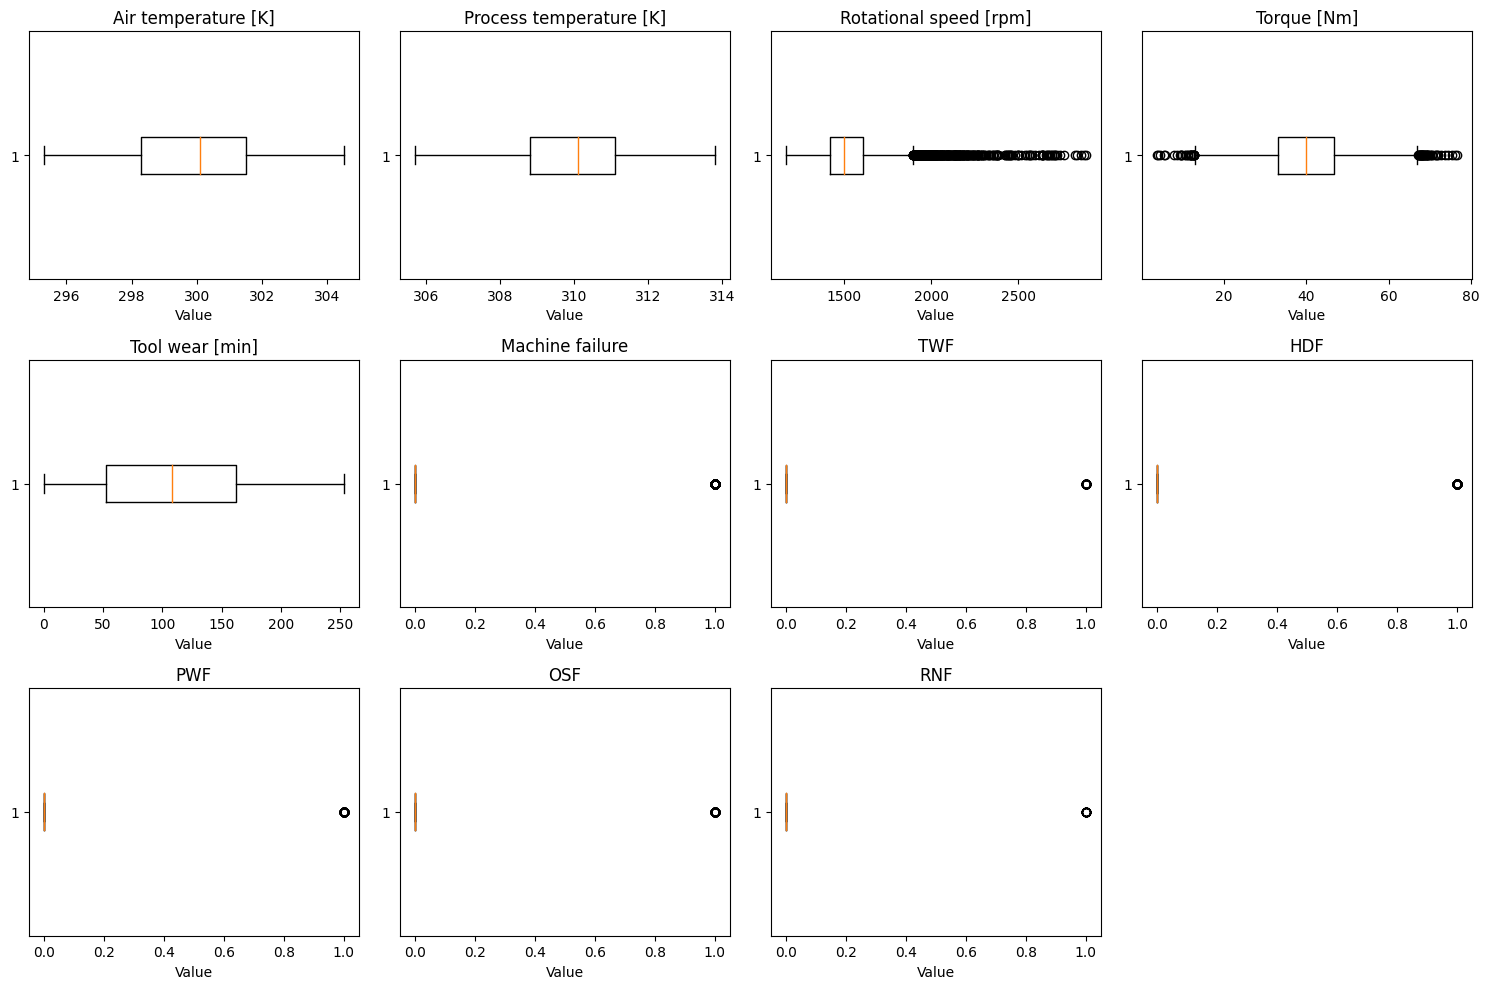

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


columns = ['Air temperature [K]', 'Process temperature [K]',
           'Rotational speed [rpm]', 'Torque [Nm]',
           'Tool wear [min]', 'Machine failure',
           'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Memastikan semua kolom ada di DataFrame
existing_columns = [col for col in columns if col in dataset.columns]

# Membuat boxplot untuk setiap kolom numerik yang ada di DataFrame
plt.figure(figsize=(15, 10))

for i, column in enumerate(existing_columns, 1):
    plt.subplot(3, 4, i)  # 3 baris, 4 kolom
    plt.boxplot(dataset[column].dropna(), vert=False)  # vert=False untuk orientasi horizontal
    plt.title(column)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd

# Fungsi untuk menentukan batas outlier
def outlier_bound(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Kolom yang ingin dideteksi outliernya
outlier_columns = ['Rotational speed [rpm]', 'Torque [Nm]']

for column in outlier_columns:
    if column in dataset.columns:  # Memeriksa apakah kolom ada di DataFrame
        lower_bound, upper_bound = outlier_bound(dataset[column])
        outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(dataset)) * 100
        print(f'Outliers in {column}: {len(outliers)} ({outlier_percentage:.2f}%)')
    else:
        print(f'Kolom {column} tidak ditemukan di DataFrame.')

Outliers in Rotational speed [rpm]: 418 (4.18%)
Outliers in Torque [Nm]: 69 (0.69%)


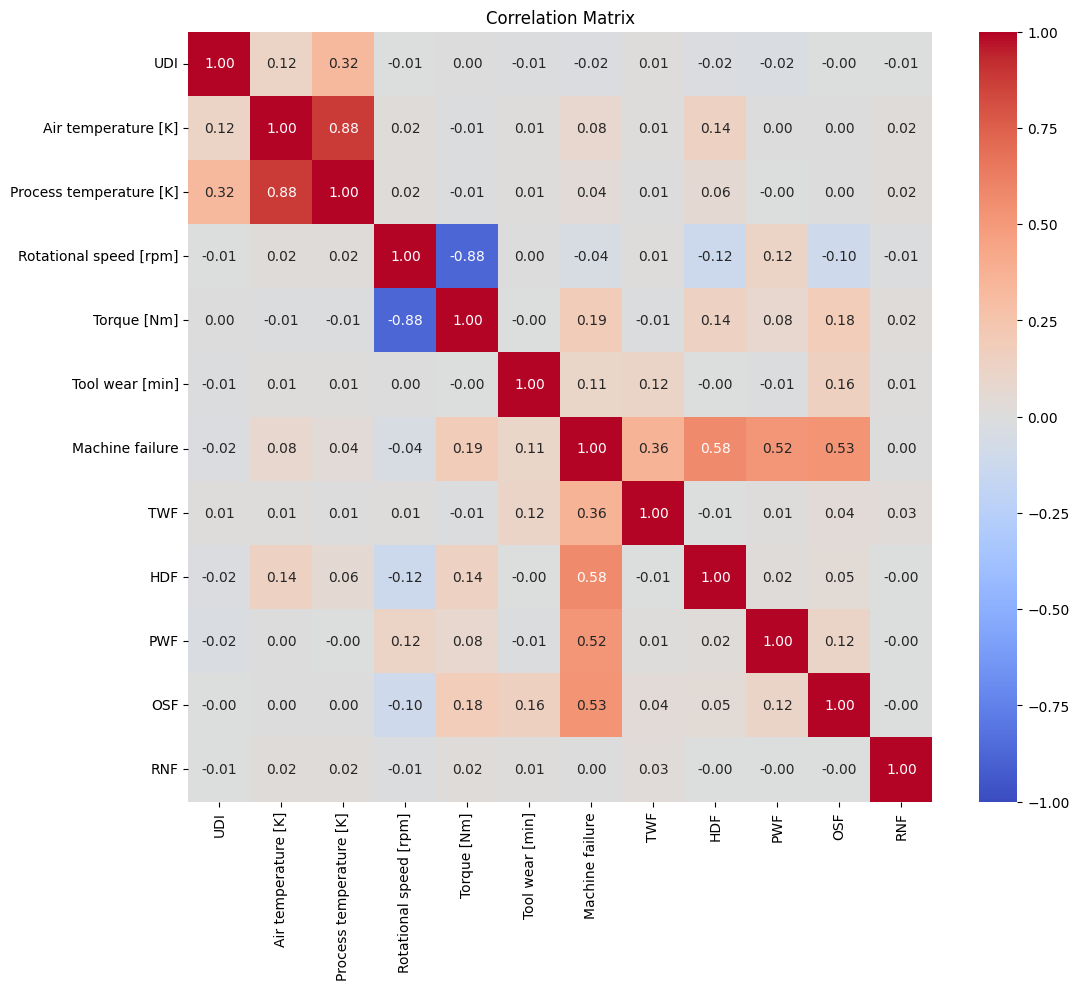

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = dataset.select_dtypes(include=[float, int])

# Menghitung matriks korelasi
corr_matrix = numeric_data.corr()

# Membuat plot korelasi
plt.figure(figsize=(12, 10))  # Mengatur ukuran figure sesuai kebutuhan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Kesimpulan hasil EDA: <br>
Berdasarkan EDA yang telah dilakukan, maka diperoleh beberapa informasi sebagai berikut:<br>
Data fitur cukup terdistribusi dengan baik.Data <br>
target machine failure sangatlah tidak seimbang.<br> Terdapat outlier pada fitur Rotational speed dan Torque,yang masing-masing sebesar 4.18% dan 0.69%.<br> Tidak ada fitur yang memiliki hubungan kuat dengan target. <br> Terdapat hubungan kuat antar fitur:Air temperature dan Process temperature: 0.88Rotational speed dan Torque: -0.88

#4 Data Preparation

In [ ]:

# Cek kolom yang ada dalam dataset
print("Kolom yang ada dalam dataset:", dataset.columns)

# Kolom yang ingin dihapus
columns_to_drop = ['UID', 'Product ID', 'Process temperature', 'Torque', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Hapus kolom yang ada dalam dataset
existing_columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]
dataset = dataset.drop(existing_columns_to_drop, axis=1)

# Variabel yang tersisa
print(f"Variabel yang tersisa: {list(dataset.columns)}")

Kolom yang ada dalam dataset: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
Variabel yang tersisa: ['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']


In [ ]:

outlier_columns = ['Rotational speed [rpm]'] # Torque sudah dihapus
print(f"Jumlah data sebelum menghapus outlier: {len(dataset)}")

# Hapus outlier
for column in outlier_columns:
    lower_bound, upper_bound = outlier_bound(dataset[column])
    dataset = dataset.drop(dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)].index)\
        .reset_index(inplace=False, drop=True)

print(f"Jumlah data setelah menghapus outlier: {len(dataset)}")

Jumlah data sebelum menghapus outlier: 10000
Jumlah data setelah menghapus outlier: 9582


In [ ]:
# Mengubah tipe kategorikal 'Type' menjadi numerik
dataset = dataset.replace({'Type': {'L': 0, 'M': 1, 'H': 2}})
print(dataset.sample(5))

       UDI  Type  Air temperature [K]  Process temperature [K]  \
4045  4215     0                301.9                    310.6   
4173  4351     1                301.9                    309.7   
2478  2580     0                299.3                    309.1   
4464  4661     0                303.2                    311.2   
5327  5571     1                302.4                    312.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  
4045                    1573         36.6               15                0  
4173                    1568         37.5              135                0  
2478                    1795         24.7              187                0  
4464                    1439         43.9               30                0  
5327                    1492         47.7                7                0  


In [ ]:

# Periksa dan hapus data duplikat
print(f"Jumlah data sebelum menghapus duplikat: {len(dataset)}")
print(f"Jumlah data duplikat: {dataset.duplicated().sum()}")

dataset = dataset.drop_duplicates().reset_index(inplace=False, drop=True)

print(f"Jumlah data setelah menghapus duplikat: {len(dataset)}")

Jumlah data sebelum menghapus duplikat: 9582
Jumlah data duplikat: 0
Jumlah data setelah menghapus duplikat: 9582


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Pisahkan fitur dan target
X_new = dataset.drop('Machine failure', axis=1)
y_new = dataset['Machine failure']

X_new.reset_index(drop=True, inplace=True)
y_new.reset_index(drop=True, inplace=True)

# Menyeimbangkan nilai variabel target
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X_new, y_new)
print(y_balanced.value_counts())

Machine failure
0    9278
1    9278
Name: count, dtype: int64


#4 Model Development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Nama kolom yang ada di dataset
print("Kolom dalam dataset:", dataset.columns)

# Kolom yang akan di-scale
columns_to_scale = ['Type', 'Air temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']

# Membagi dataset menjadi fitur (X) dan target (y)
X = dataset.drop('Machine failure', axis=1)  # Ganti 'Machine failure' dengan nama kolom target jika berbeda
y = dataset['Machine failure']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memastikan kolom yang akan di-scale ada di dataset
for column in columns_to_scale:
    if column not in X_train.columns:
        print(f"Kolom '{column}' tidak ditemukan dalam X_train")
    if column not in X_test.columns:
        print(f"Kolom '{column}' tidak ditemukan dalam X_test")

# Scaling data agar memiliki rentang yang tidak berbeda jauh
standard_scaler = StandardScaler()
X_train[columns_to_scale] = standard_scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = standard_scaler.transform(X_test[columns_to_scale])

# Data setelah scaling
print(X_train.describe())

Kolom dalam dataset: Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')
                UDI          Type  Air temperature [K]  \
count   7665.000000  7.665000e+03         7.665000e+03   
mean    5024.063275  4.820381e-17        -1.066324e-14   
std     2892.526140  1.000065e+00         1.000065e+00   
min        2.000000 -7.458857e-01        -2.352667e+00   
25%     2504.000000 -7.458857e-01        -8.475012e-01   
50%     5049.000000 -7.458857e-01         5.426322e-03   
75%     7533.000000  7.437479e-01         7.580094e-01   
max    10000.000000  2.233381e+00         2.263176e+00   

       Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
count              7665.000000            7.665000e+03  7665.000000   
mean                310.001396           -7.749690e-16    40.881696   
std                   1.482872            1.000065e+00 

In [ ]:

from sklearn.model_selection import train_test_split

# Bagi dataset menjadi 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

new_feature = X_test.tail(100)  # Ambil 100 data fitur untuk simulasi data baru
new_target = y_test.tail(100)  # Ambil 100 data target untuk simulasi data baru

X_test = X_test[:-100]
y_test = y_test[:-100]

print(f"Data training: {len(X_train)}")
print(f"Data testing: {len(X_test)}")

Data training: 14844
Data testing: 3612


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# Inisialisasi model Logistic Regression dan Random Forest
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Lakukan cross validation pada kedua model
models = [lr, rf]
scoring = ['precision', 'recall', 'f1', 'accuracy']

# Simpan hasil evaluasi dalam sebuah list
evaluation_results = []

for model in models:
    print(f"{'Model':<15}: {type(model).__name__}")
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    # Menyimpan hasil evaluasi
    model_result = {
        'Model': type(model).__name__,
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-Score': scores['test_f1'].mean(),
        'Accuracy': scores['test_accuracy'].mean()
    }
    evaluation_results.append(model_result)

    # Mencetak hasil cross validation
    for score in scores.keys():
        print(f"{score:<15}: {scores[score]}")
    print()

# Membuat DataFrame untuk hasil evaluasi
evaluation_df = pd.DataFrame(evaluation_results)

# Menampilkan tabel evaluasi
print("\nTabel Evaluasi:\n")
print(evaluation_df)

Model          : LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fit_time       : [0.32877254 0.25645137 0.34549952 0.34070873 0.3542614 ]
score_time     : [0.02908826 0.04632378 0.04789352 0.03128576 0.03379679]
test_precision : [0.83365949 0.82560418 0.83178191 0.83948087 0.83643617]
test_recall    : [0.86118598 0.85175202 0.84242424 0.82760943 0.84770889]
test_f1        : [0.8471992  0.8384743  0.83706925 0.83350288 0.84203481]
test_accuracy  : [0.84472886 0.83597171 0.83597171 0.83462445 0.84097035]

Model          : RandomForestClassifier
fit_time       : [2.03519249 1.09312081 1.08404684 2.16847754 2.66487193]
score_time     : [0.05770397 0.05827999 0.0586133  0.15930605 0.08392739]
test_precision : [0.99463807 0.99197861 0.99331104 0.99464166 0.99264214]
test_recall    : [1. 1. 1. 1. 1.]
test_f1        : [0.99731183 0.99597315 0.9966443  0.99731363 0.99630749]
test_accuracy  : [0.99730549 0.99595824 0.99663186 0.99730549 0.9962938 ]


Tabel Evaluasi:

                    Model  Precision    Recall  F1-Score  Accuracy
0      LogisticRegression

#5 Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Melatih model Random Forest pada seluruh data training dan evaluasi pada data training
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)

print("Confusion Matrix untuk Random Forest pada data training:\n")
print(confusion_matrix(y_train, y_train_pred), "\n")
print("Classification Report untuk Random Forest pada data training:\n")
print(classification_report(y_train, y_train_pred))

Confusion Matrix untuk Random Forest pada data training:

[[7422    0]
 [   0 7422]] 

Classification Report untuk Random Forest pada data training:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7422
           1       1.00      1.00      1.00      7422

    accuracy                           1.00     14844
   macro avg       1.00      1.00      1.00     14844
weighted avg       1.00      1.00      1.00     14844



Berdasarkan hasil evaluasi, model Random Forest menunjukkan performa yang lebih unggul dibandingkan Logistic Regression. Confusion Matrix untuk Random Forest pada data training menunjukkan hasil yang sempurna dengan precision, recall, dan f1-score masing-masing sebesar 1.00, menunjukkan kemampuan model untuk mengklasifikasikan data dengan akurasi 100%. Sementara itu, Logistic Regression tidak memberikan hasil sebaik ini. Oleh karena itu, Random Forest merupakan pilihan yang lebih baik untuk mengklasifikasikan data mesin dalam konteks ini.